# Pymaceuticals Inc.

### Analysis

- Add your analysis here.
 

In [268]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [196]:
# Checking the number of mice
num_mice = mouse_study_complete_df['Mouse ID'].nunique()
num_mice

249

In [262]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = mouse_study_complete_df[mouse_study_complete_df.duplicated(['Mouse ID', 'Timepoint'])]
# Extract unique Mouse IDs with duplicates
unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()
unique_duplicate_mice

array(['g989'], dtype=object)

In [280]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [199]:
# Create a clean DF by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_complete_df.drop_duplicates(['Mouse ID'])
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [279]:
# Checking the number of mice after droping duplicates DF.( I couldn’t get this right even after dropping duplicate it’s still the same)
num_mice_afclean = cleaned_df['Mouse ID'].nunique()
num_mice_afclean

249

## Summary Statistics

In [201]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen'
drug_region = mouse_study_complete_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean, median, variance, standard deviation, and SEM
summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': drug_region.mean(),
    'Median Tumor Volume': drug_region.median(),
    'Tumor Volume Variance': drug_region.var(),
    'Tumor Volume Std. Dev.': drug_region.std(),
    'Tumor Volume Std. Err.': drug_region.sem()
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [202]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Calculate mean, median, variance, standard deviation, and SEM for 'Tumor Volume (mm3)'

# Calculate mean, median, variance, standard deviation, and SEM
summary_stats_df_advanced = pd.DataFrame({
    'mean': drug_region.mean(),
    'median': drug_region.median(),
    'var': drug_region.var(),
    'std': drug_region.std(),
    'sem': drug_region.sem()
})
summary_stats_df_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

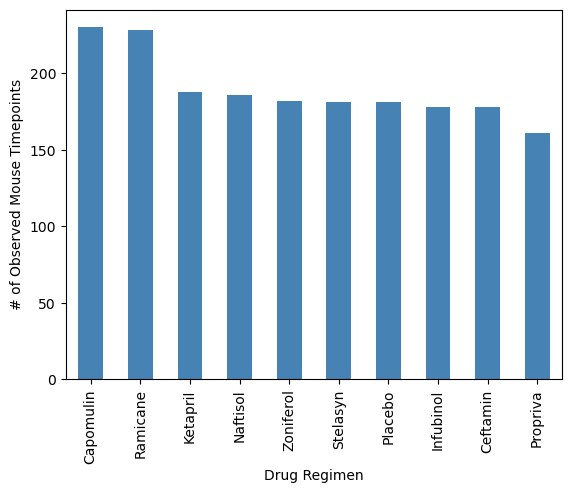

In [203]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a bar plot
regimen_counts.plot(kind='bar', color='steelblue')

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

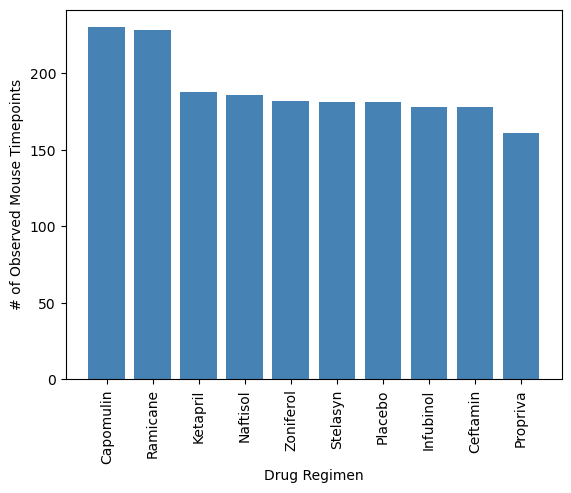

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the number of occurances for each drug regimen
regimen_counts = mouse_study_complete_df['Drug Regimen'].value_counts()

# Set x axis and tick locations
x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]

# Create the bar plot
plt.bar(x_axis, regimen_counts, color='steelblue')

# set x-axis labels
plt.xticks(tick_locations, regimen_counts.index,  rotation="vertical")

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

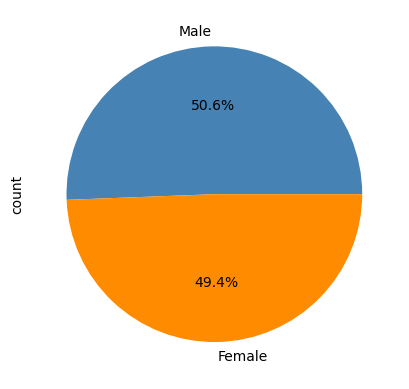

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of male and female mice
gender_distribution = mouse_study_complete_df['Sex'].value_counts()
# Create a pie plot 
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['steelblue', 'darkorange'])
plt.show()

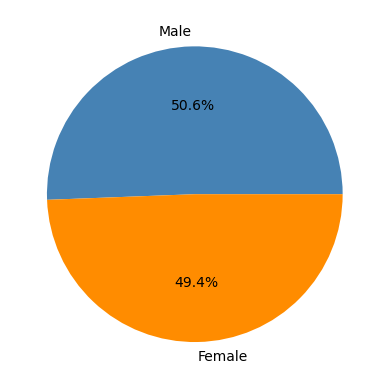

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set labels and colors
labels = gender_distribution.index
colours = ['steelblue', 'darkorange']
# Create a pie plot
plt.pie(gender_distribution, labels=labels, autopct='%1.1f%%', colors=colours)
plt.show()


## Quartiles, Outliers and Boxplots

In [245]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:

# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DF for the selected regimens
selected_df = mouse_study_complete_df[mouse_study_complete_df['Drug Regimen'].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Create a DF with the Mouse ID and last timepoints
last_timepoints_df = pd.DataFrame(last_timepoints).reset_index()

# Merge this group df with the original DF to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints_df, mouse_study_complete_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Print the final_df
final_tumor_volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [208]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Filter the DF for the current treatment
    treatment_df = mouse_study_complete_df.loc[mouse_study_complete_df['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    
    # Calculate the IQR for the current treatment
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Print potential outliers
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {potential_outliers}")

    

Capomulin's potential outliers: 1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


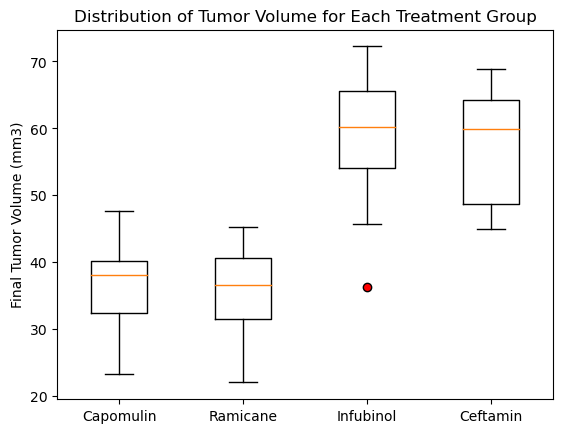

In [259]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the FinalDF for the selected regimens
selected_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(selected_regimens)]

# Create a box plot sets the marker face color of the outliers to red  
plt.boxplot([selected_df[selected_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in selected_regimens], labels=selected_regimens, flierprops=dict(markerfacecolor='red'))

# Add labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

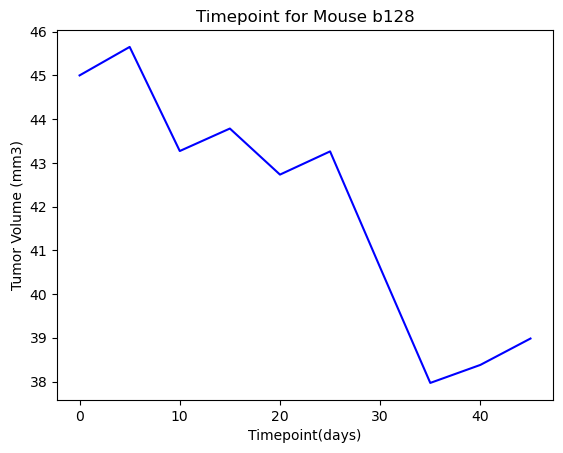

In [278]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the DataFrame for the Capomulin regimen,timepoint for a single mouse
capomulin_mouse_df = mouse_study_complete_df[(mouse_study_complete_df['Drug Regimen'] == 'Capomulin') & (mouse_study_complete_df['Mouse ID'] == 'b128')]

# Create a line plot
plt.plot(capomulin_mouse_df['Timepoint'], capomulin_mouse_df['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint for Mouse b128')
plt.show()

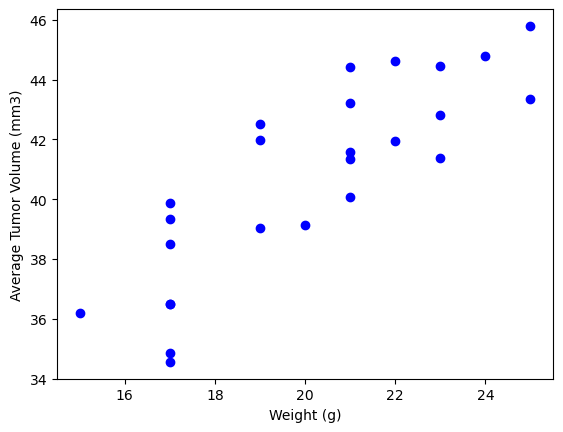

In [216]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DF for the Capomulin regimen
capomulin_df = mouse_study_complete_df[mouse_study_complete_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

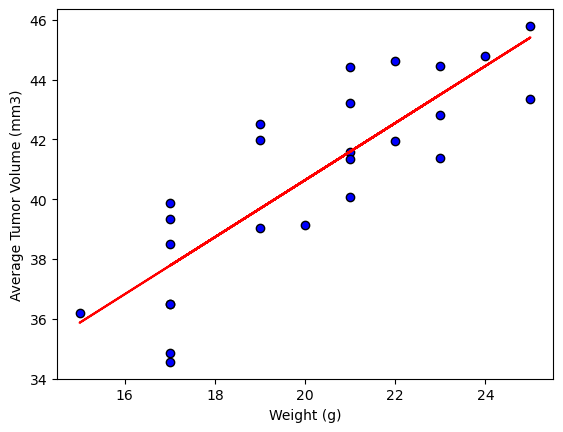

In [276]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient using scipy.stats.pearsonr
correlation_coefficient = st.pearsonr(mouse_weights, average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

# Create a scatter plot with the linear regression line
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='blue', edgecolors='black')

# Plot the linear regression line
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red')

# Add labels 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()